# Matplotlib

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 20)

df = pd.read_csv("data/cars.csv", parse_dates=['offer_timestamp'])
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


## Podstawowe typy wykresów

### Wykres liniowy (*line plot*)

**Kiedy używamy:**
- mamy dwie zmienne o rozkładzie ciągłym
- istnieje między nimi zależność
- powinien istnieć określony porządek wartości dla zmiennej niezależnej

---
**Zadanie:**

Zwizualizuj średnią cenę samochodów wyprodukowanych w latach 1990-2021

In [3]:
price_per_year = df[df["prod_year"]>=1990].groupby("prod_year")["price"].mean()
price_per_year


prod_year
1990     25980.904762
1991     24195.012195
1992     23392.160494
1993     19922.012987
1994     21312.445652
            ...      
2017     66444.032132
2018     76299.491055
2019     78196.686029
2020    101324.949654
2021    142011.310078
Name: price, Length: 32, dtype: float64

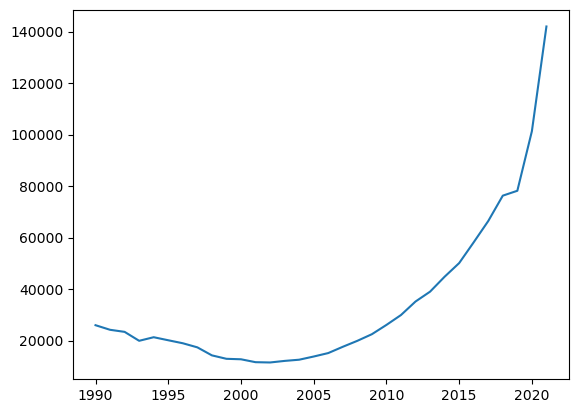

In [4]:
import matplotlib.pyplot as plt

plt.plot(price_per_year.index, price_per_year.values)  #;

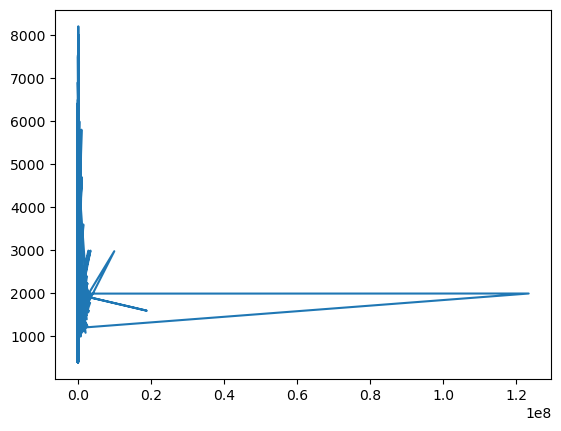

In [5]:
plt.plot(df["mileage"], df["engine_vol"]);

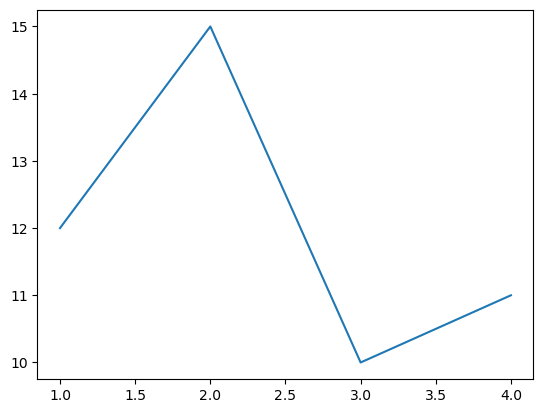

In [6]:
plt.plot([1, 2, 3, 4], [12, 15, 10, 11]);

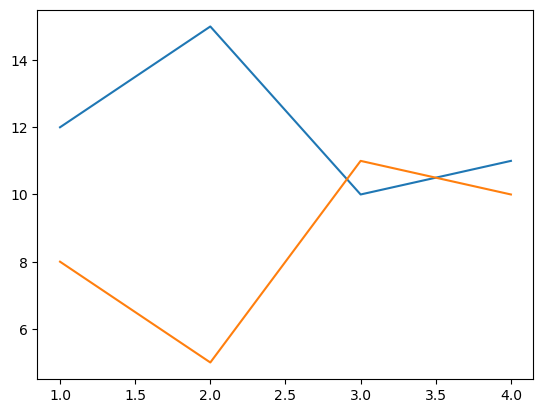

In [7]:
plt.plot([1, 2, 3, 4], [12, 15, 10, 11])
plt.plot([1, 2, 3, 4], [8, 5, 11, 10]);

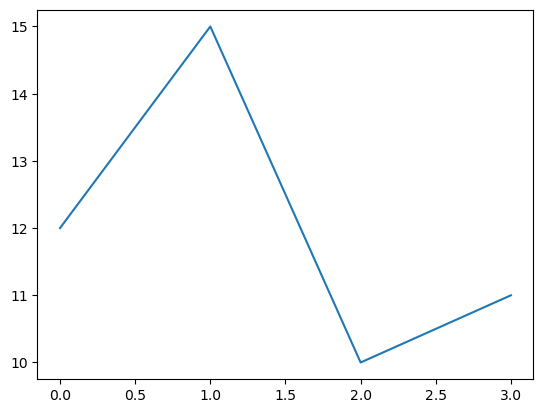

In [8]:
plt.plot([12, 15, 10, 11]);

# plt.show()

> ZADANIA

### Wykres punktowy (*scatter plot*)

**Kiedy używamy:**
- mamy dwie zmienne z czego przynajmniej jedna (niezależna) ma rozkład dyskretny ALBO mamy dwie zmienne o rozkładzie ciągłym oraz dane pomiarowe konkretnych obserwacji
- istnieje między nimi zależność

---
**Zadanie:**

Sprawdź czy istnieje zależność liniowa między mocą samochodu a jego ceną.

In [9]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


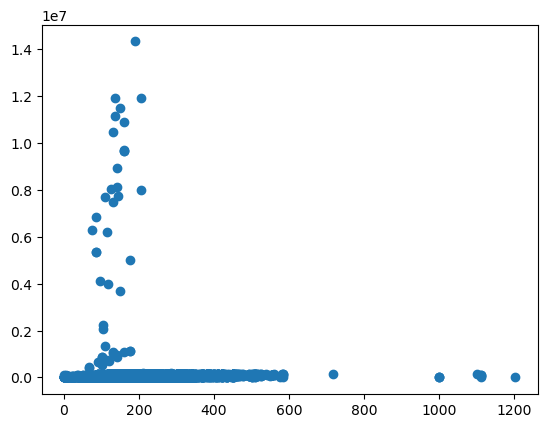

In [10]:
plt.scatter(df["power"], df["price"]);

W danych występują outliery. Warto się ich najpierw pozbyć.

In [11]:
df = df[(df["power"] < 600) & (df["price"] < 1e5)]

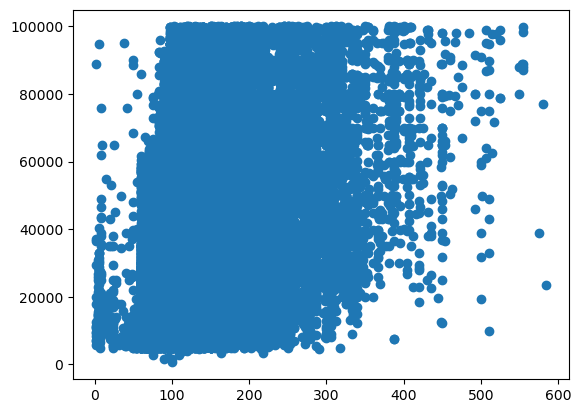

In [12]:
plt.scatter(df["power"], df["price"]);

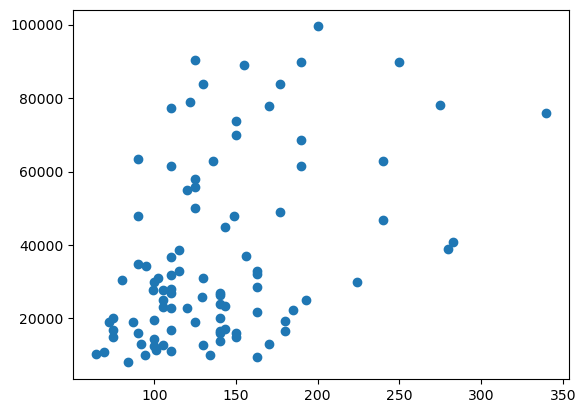

In [13]:
plt.scatter(df["power"][::1000], df["price"][::1000]);

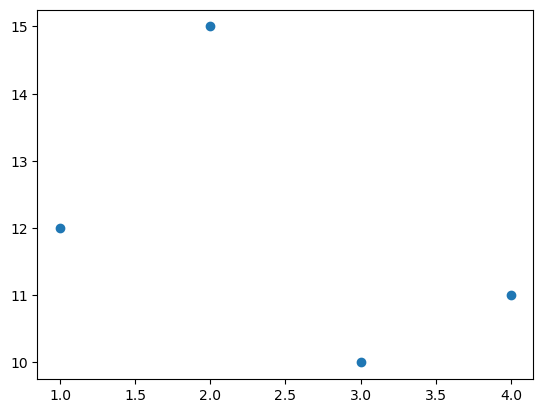

In [14]:
plt.scatter([1, 2, 3, 4], [12, 15, 10, 11]);

> ZADANIA

### Histogram (*histogram*)

**Kiedy używamy:**
- mamy wiele obserwacji zmiennej numerycznej, której rozkład chcemy zwizualizować

---
**Zadanie:**

Zwizualizuj rozkład zmiennej `mileage` zawierającej informacje o przebiegu samochodów.

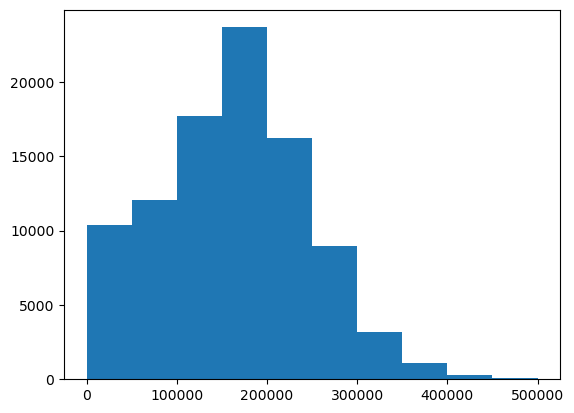

In [15]:
df = df[df["mileage"]<0.5e6]

plt.hist(df["mileage"]);

Wykres jest mało czytelny, dodajmy krawędzie.

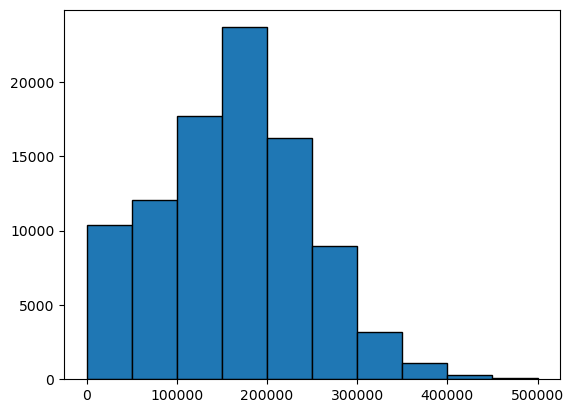

In [16]:
plt.hist(df["mileage"], edgecolor='black');

Możemy również zdefiniować przedziały słupków. Albo określimy ich liczbę, albo granice przedziałów.

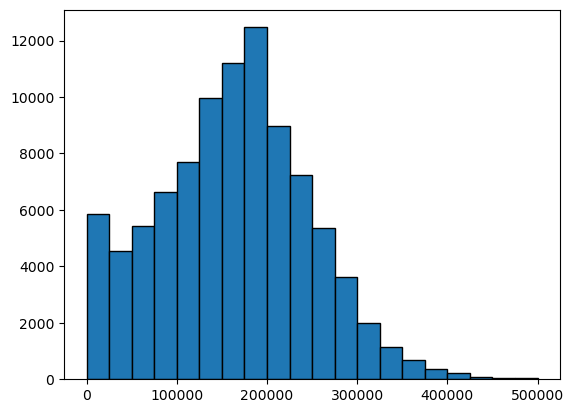

In [17]:
plt.hist(df["mileage"], edgecolor='black', bins=20);

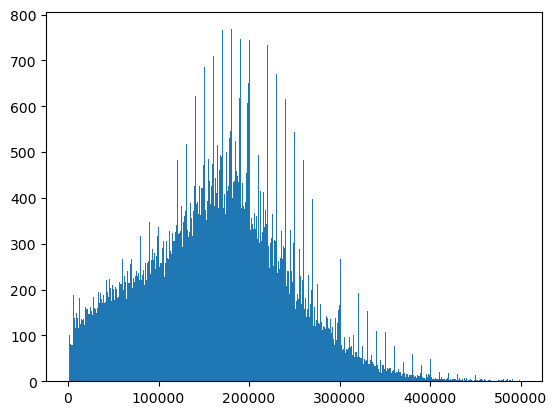

In [18]:
plt.hist(df["mileage"], bins=range(1000, 500000, 1000));

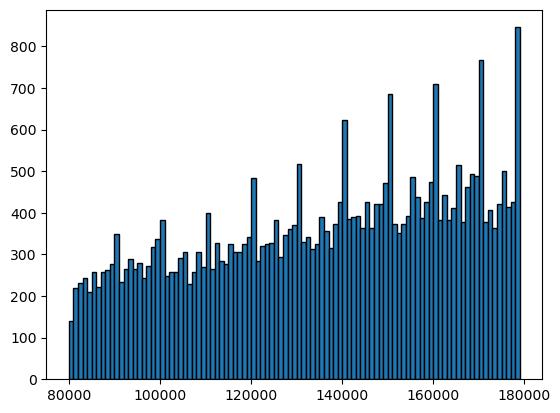

In [19]:
plt.hist(df[(df["mileage"]>0.8e5) & (df["mileage"]<1.8e5)]["mileage"], edgecolor='black', bins=range(80000, 180000, 1000));

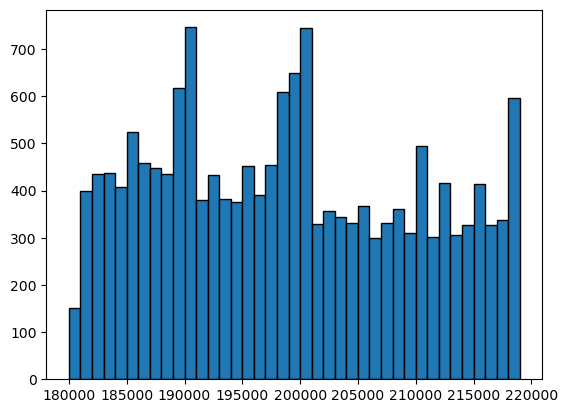

In [20]:
plt.hist(df[(df["mileage"]>1.8e5) & (df["mileage"]<2.2e5)]["mileage"], edgecolor='black', bins=range(180000, 220000, 1000));

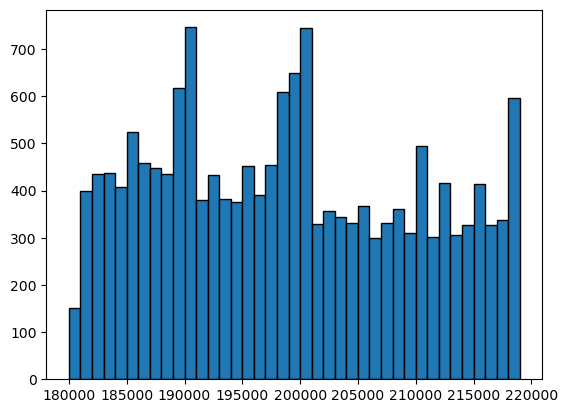

In [21]:
n, bins, _ = plt.hist(
    df[(df["mileage"]>1.8e5) & (df["mileage"]<2.2e5)]["mileage"], edgecolor='black', bins=range(180000, 220000, 1000));

In [22]:
n

array([151., 400., 435., 438., 407., 524., 458., 447., 435., 618., 746.,
       379., 433., 383., 375., 452., 391., 455., 608., 650., 744., 330.,
       357., 343., 332., 367., 300., 332., 361., 311., 494., 301., 416.,
       305., 326., 414., 328., 337., 597.])

In [23]:
bins

array([180000., 181000., 182000., 183000., 184000., 185000., 186000.,
       187000., 188000., 189000., 190000., 191000., 192000., 193000.,
       194000., 195000., 196000., 197000., 198000., 199000., 200000.,
       201000., 202000., 203000., 204000., 205000., 206000., 207000.,
       208000., 209000., 210000., 211000., 212000., 213000., 214000.,
       215000., 216000., 217000., 218000., 219000.])

In [24]:
n.argmax()

np.int64(10)

In [25]:
bins[n.argmax()]

np.float64(190000.0)

> ZADANIA

### Wykres słupkowy (*bar plot*)

**Kiedy używamy:**
- chcemy zwizualizować relację między jedną zmienną kategoryczną i jedną zmienną ciągłą
- dla każdej unikalnej wartości pierwszej zmiennej przedstawiamy odpowiadającą jej wartość drugiej zmiennej

---
**Zadanie:**

Zwizualizuj średnią cenę samochodów marek: Fiat, Volkswagen, Mercedes-Benz.

In [26]:
brands_prices = df.groupby("brand")["price"].mean().loc[["Fiat", "Volkswagen", "Mercedes-Benz"]]
brands_prices

brand
Fiat             24484.601280
Volkswagen       30931.511328
Mercedes-Benz    36812.126667
Name: price, dtype: float64

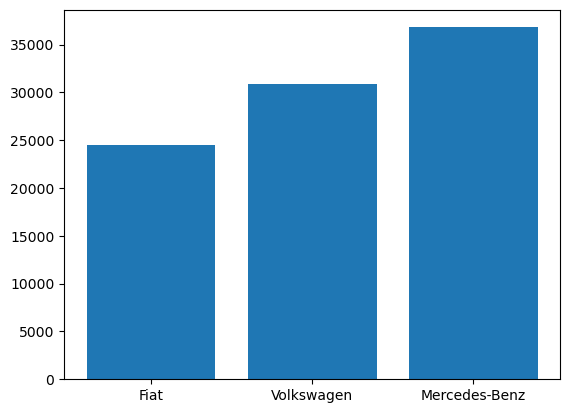

In [27]:
plt.bar(brands_prices.index, brands_prices.values);

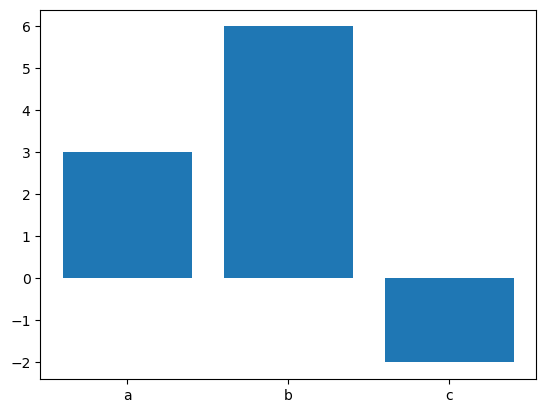

In [28]:
plt.bar(["a", "b", "c"], [3, 6, -2]);

> ZADANIA

## Stylowanie wykresu

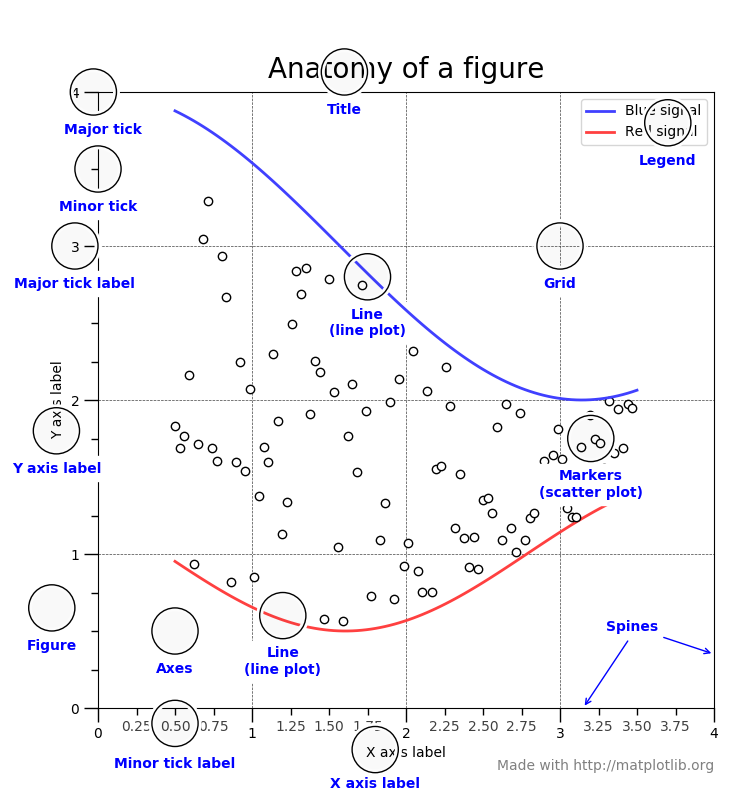

### Kolory

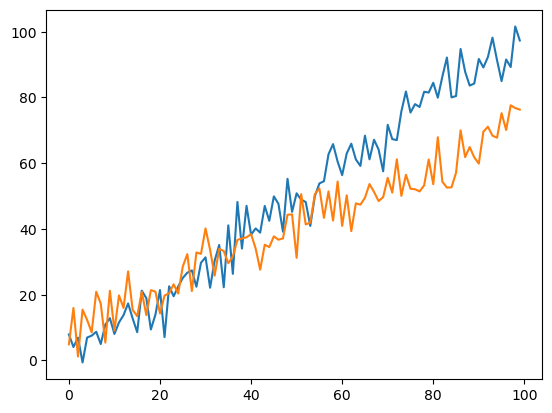

In [29]:
x = np.arange(100) + 5*np.random.randn(100)
y = 10 + 0.6*np.arange(100) + 5*np.random.randn(100)

plt.plot(x);
plt.plot(y);

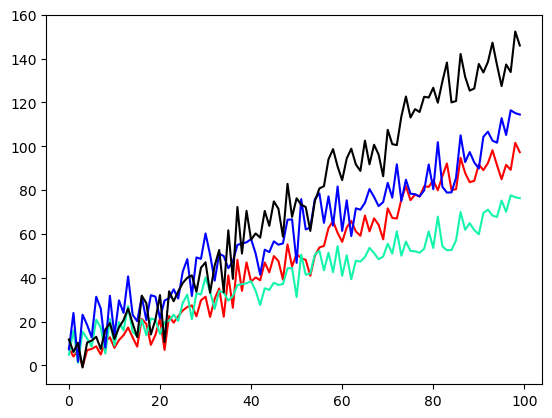

In [30]:
plt.plot(x, color='r');
plt.plot(y, color='#14f4ac');
plt.plot(1.5*y, c='blue');
plt.plot(1.5*x, c='k');

### Markery i styl linii

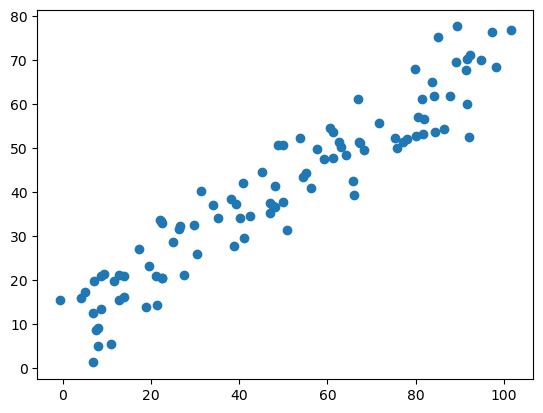

In [31]:
plt.scatter(x, y);

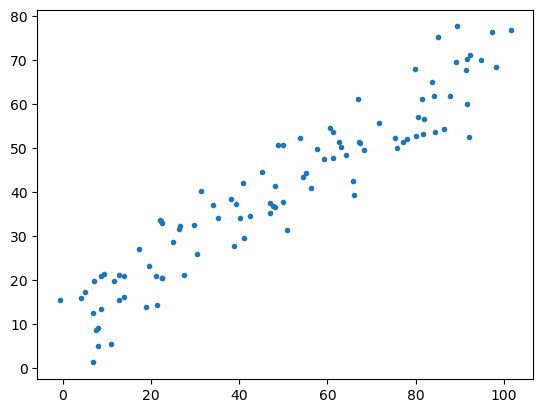

In [32]:
plt.scatter(x, y, marker='.');  # x, ^, v, *, ... -> https://matplotlib.org/stable/api/markers_api.html

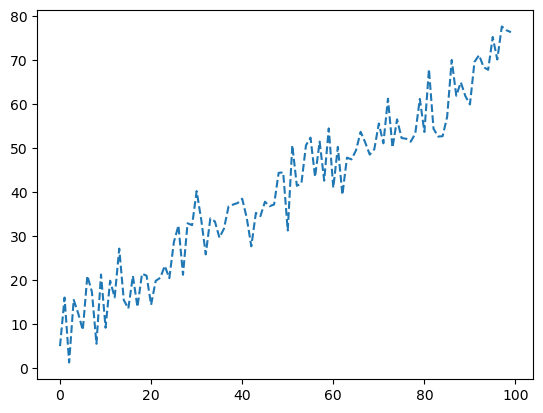

In [33]:
plt.plot(y, '--');  # .-, *-, o, ., ... -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

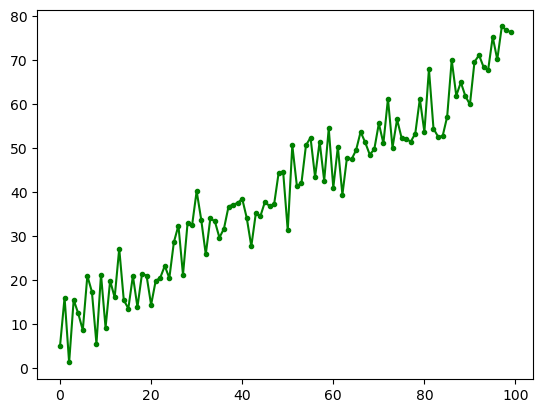

In [34]:
plt.plot(y, 'g.-');

### Opisy osi i tytuł wykresu

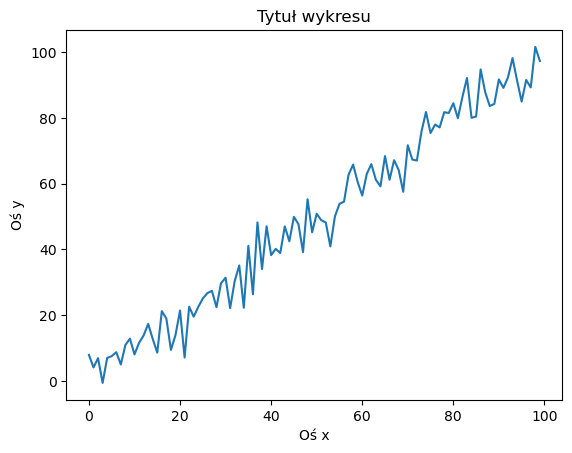

In [35]:
plt.plot(x);

plt.xlabel("Oś x");
plt.ylabel("Oś y");
plt.title("Tytuł wykresu");

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_71407/3983311706.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Tytuł wykresu ~ $\lambda \phi \cdot \epsilon$", fontsize=16);


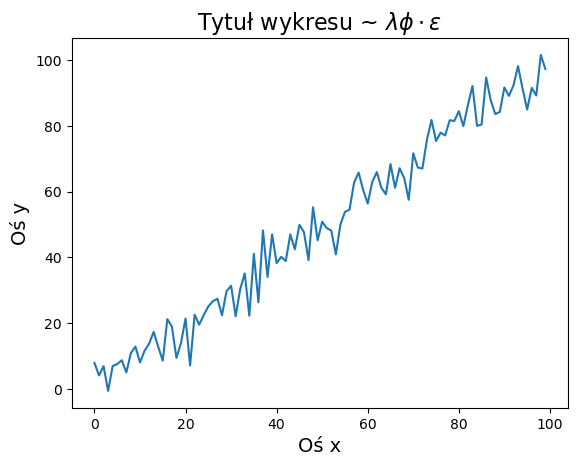

In [36]:
plt.plot(x);

plt.xlabel("Oś x", fontsize=14);
plt.ylabel("Oś y", fontsize=14);
plt.title("Tytuł wykresu ~ $\lambda \phi \cdot \epsilon$", fontsize=16);

### Granice

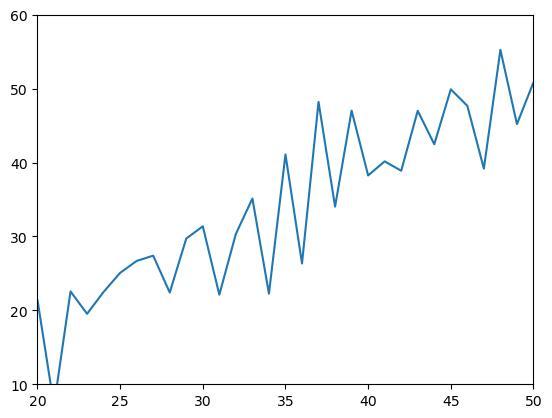

In [37]:
plt.plot(x);

plt.xlim([20, 50]);
plt.ylim(10, 60);

> ZADANIA

### Ticki

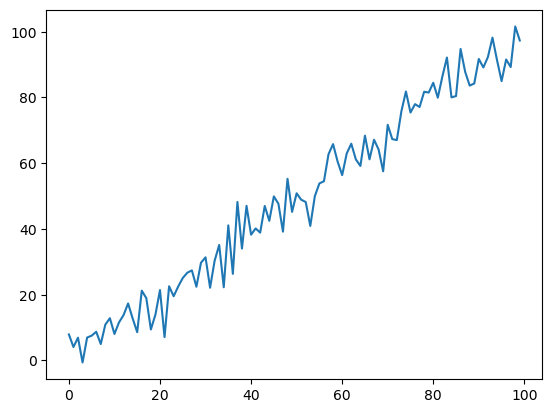

In [38]:
plt.plot(x);

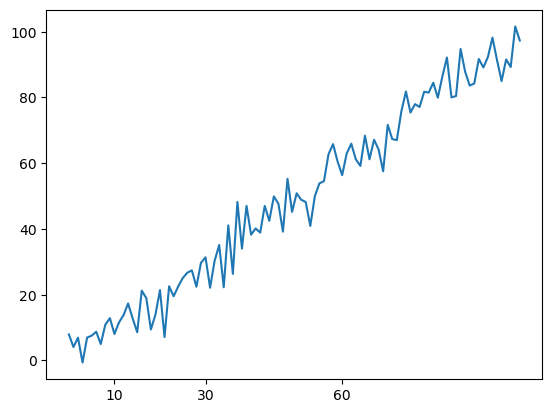

In [39]:
plt.plot(x);
plt.xticks([10, 30, 60]);

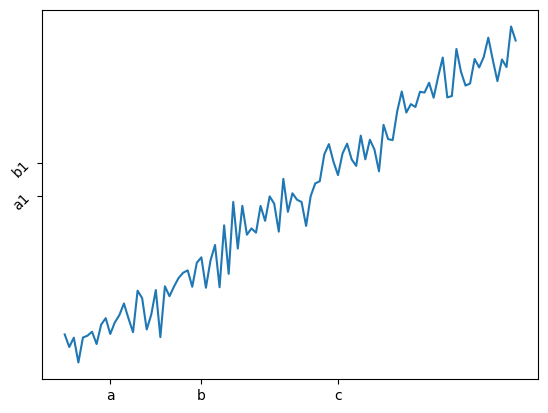

In [40]:
plt.plot(x);
plt.xticks([10, 30, 60], ["a", "b", "c"]);
plt.yticks([50, 60], ["a1", "b1"], rotation=45);

### Legenda

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_71407/638244316.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(1.5*y, label='$1.5\cdot y$');
/tmp/ipykernel_71407/638244316.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(1.5*x, label='$1.5\cdot x$');


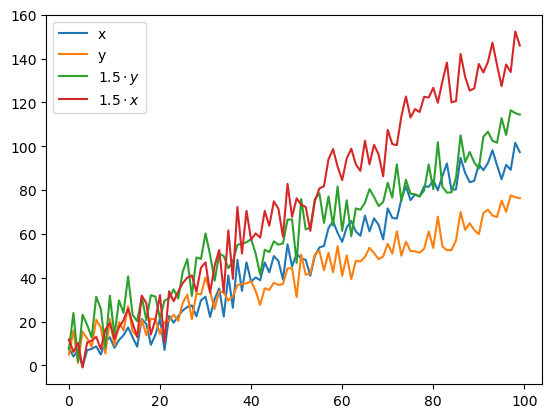

In [41]:
plt.plot(x, label='x');
plt.plot(y, label='y');
plt.plot(1.5*y, label='$1.5\cdot y$');
plt.plot(1.5*x, label='$1.5\cdot x$');

plt.legend();

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_71407/2697927654.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(1.5*y, label='$1.5\cdot y$');
/tmp/ipykernel_71407/2697927654.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(1.5*x, label='$1.5\cdot x$');


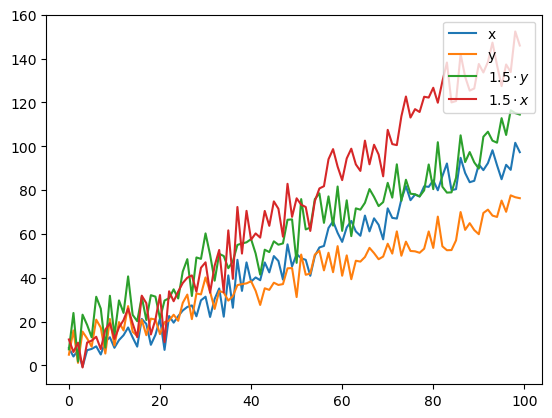

In [42]:
plt.plot(x, label='x');
plt.plot(y, label='y');
plt.plot(1.5*y, label='$1.5\cdot y$');
plt.plot(1.5*x, label='$1.5\cdot x$');

plt.legend(loc=1);  # 2, 3, ... -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### Siatka

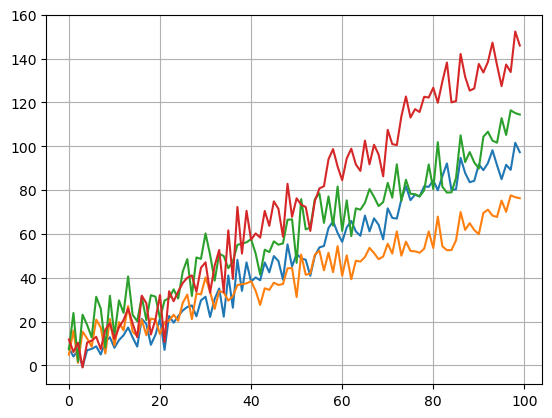

In [43]:
plt.plot(x);
plt.plot(y);
plt.plot(1.5*y);
plt.plot(1.5*x);

plt.grid();  # axis='x', 'y'

### Zmiana rozmiaru

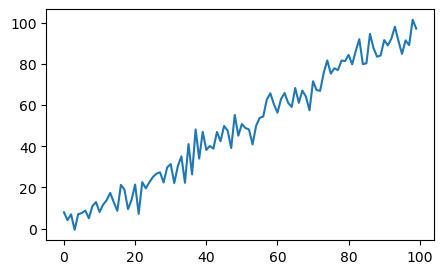

In [44]:
plt.figure(figsize=(5, 3))

plt.plot(x);

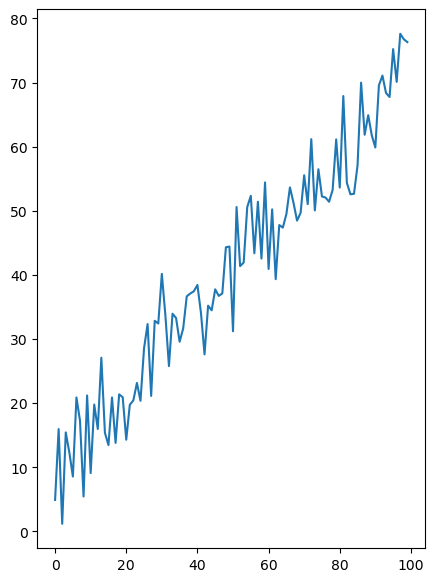

In [45]:
plt.figure(figsize=(5, 7))

plt.plot(y);

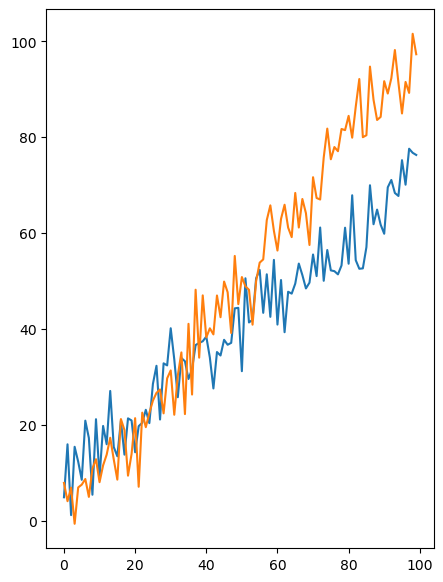

In [46]:
plt.figure(figsize=(5, 7))
plt.plot(y);

# plt.figure(figsize=(3, 2))
plt.plot(x);

> ZADANIA

### Subploty

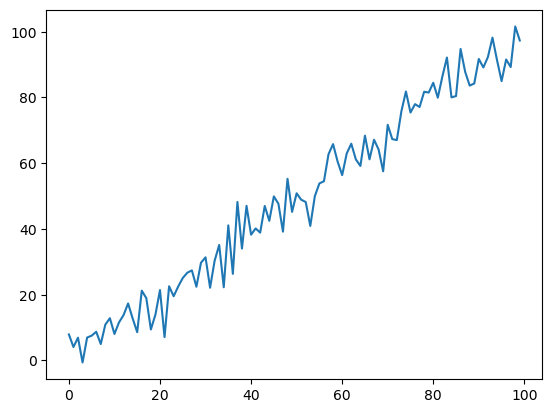

In [47]:
fig, ax = plt.subplots()

ax.plot(x);

In [48]:
ax

<Axes: >

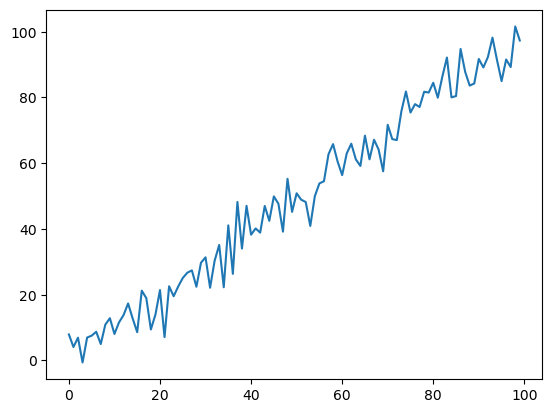

In [49]:
fig

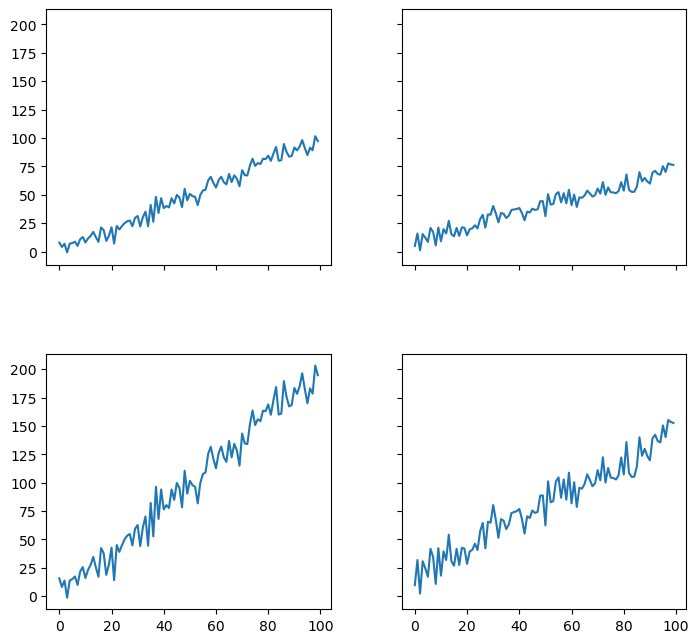

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)  # , sharex=True, sharey=True

ax[0, 0].plot(x);
ax[0, 1].plot(y);
ax[1, 0].plot(2*x);
ax[1, 1].plot(2*y);

plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.8, wspace=0.25, hspace=0.35)

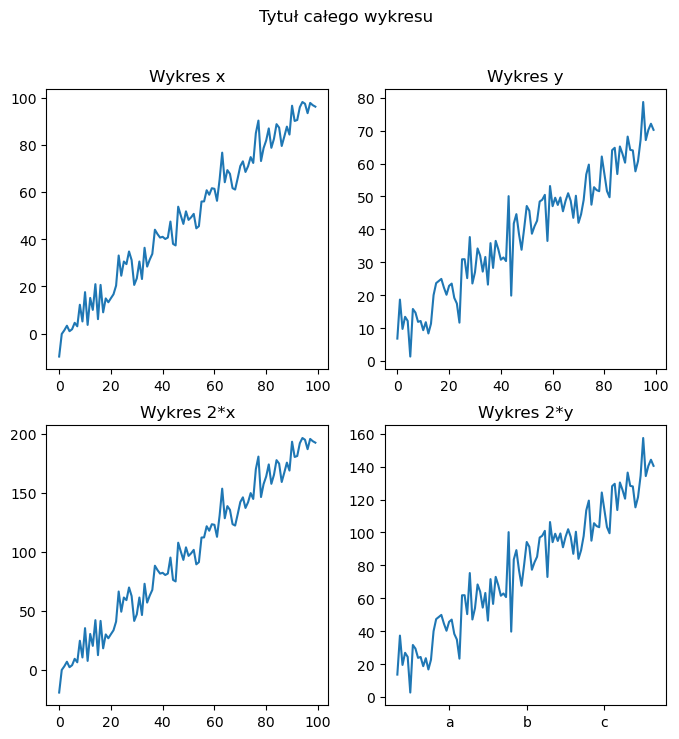

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].plot(x);
ax[0, 1].plot(y);
ax[1, 0].plot(2*x);
ax[1, 1].plot(2*y);

ax[0, 0].set_title("Wykres x");
ax[0, 1].set_title("Wykres y");
ax[1, 0].set_title("Wykres 2*x");
ax[1, 1].set_title("Wykres 2*y");

fig.suptitle("Tytuł całego wykresu");

ax[1, 1].set_xticks([20, 50, 80], ["a", "b", "c"]);

In [ ]:
ax

array([[<Axes: title={'center': 'Wykres x'}>,
        <Axes: title={'center': 'Wykres y'}>],
       [<Axes: title={'center': 'Wykres 2*x'}>,
        <Axes: title={'center': 'Wykres 2*y'}>]], dtype=object)

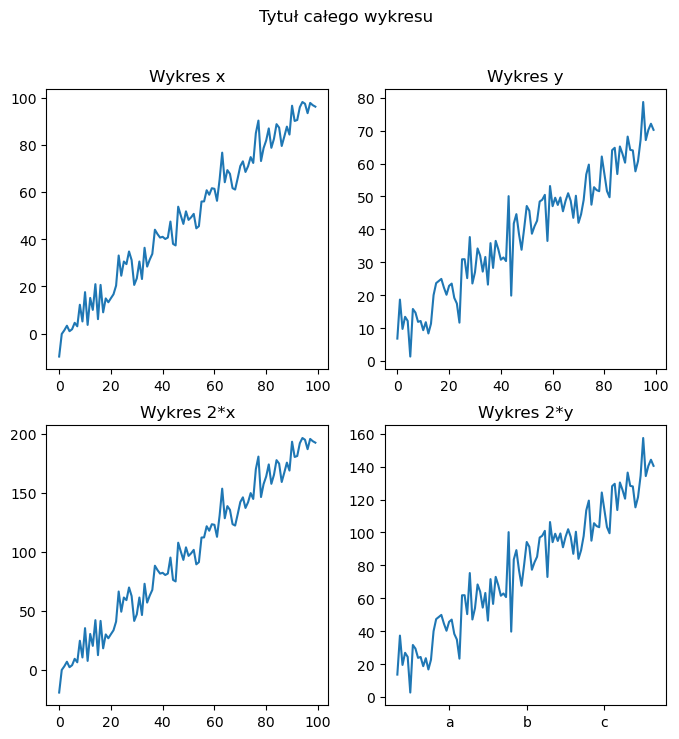

In [ ]:
fig

> ZADANIA

### Colorbar i colormap

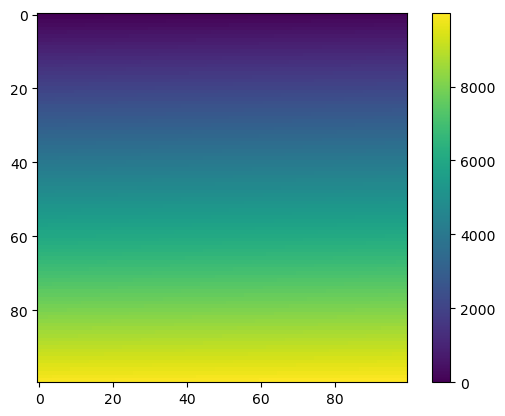

In [ ]:
plt.imshow(np.arange(10000).reshape(100, 100));  # , cmap='jet'

plt.colorbar();

### Zaawansowane stylowanie ticków

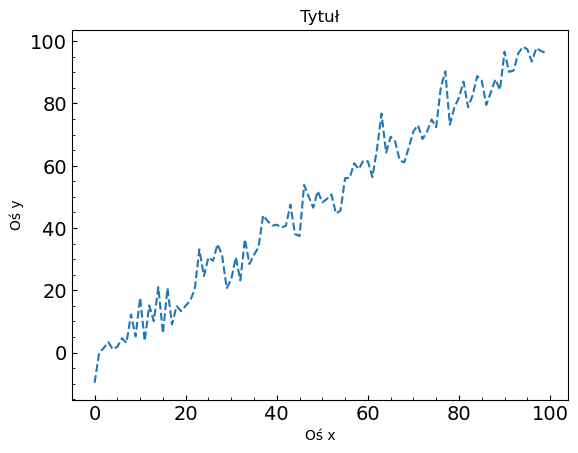

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, '--')

ax.set_title("Tytuł")
ax.set_xlabel('Oś x')
ax.set_ylabel('Oś y')

ax.tick_params(axis='both', which='both', direction='in', labelsize=14)  # axis: x, y, both  which: major, minor, both
ax.minorticks_on()

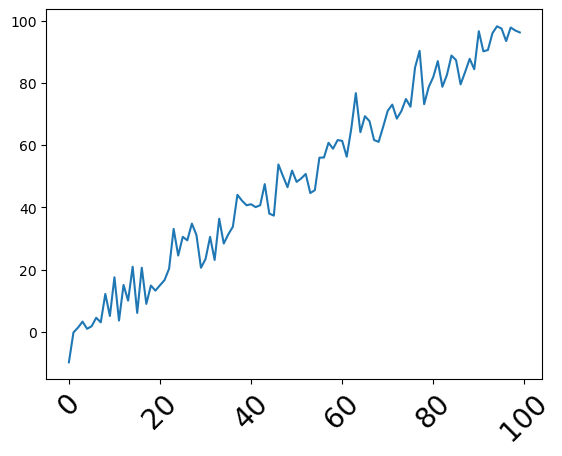

In [ ]:
plt.plot(x)

plt.xticks(rotation=45, fontsize=20);

### Dwie osie pionowe

In [ ]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

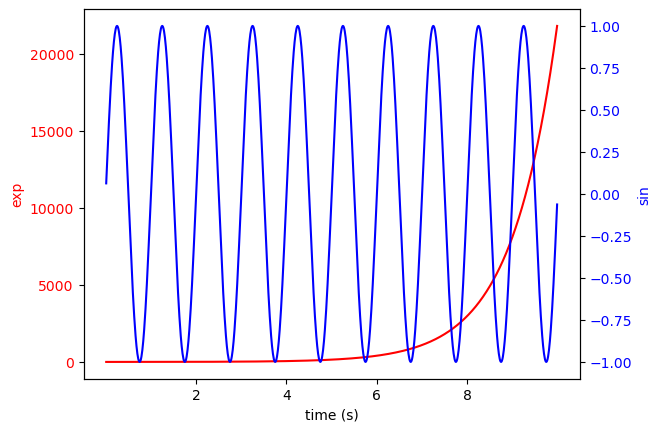

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color='red')
ax1.plot(t, data1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('sin', color='blue')
ax2.plot(t, data2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks([2, 4, 6, 8]);  # ax2

### Zapis do pliku

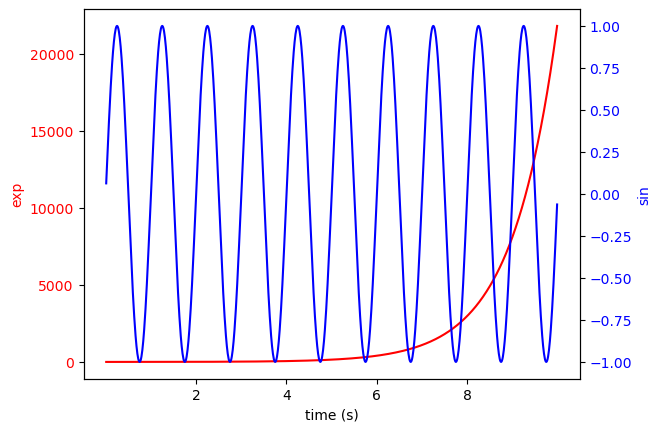

In [ ]:
fig

In [ ]:
fig.savefig("fig.png")

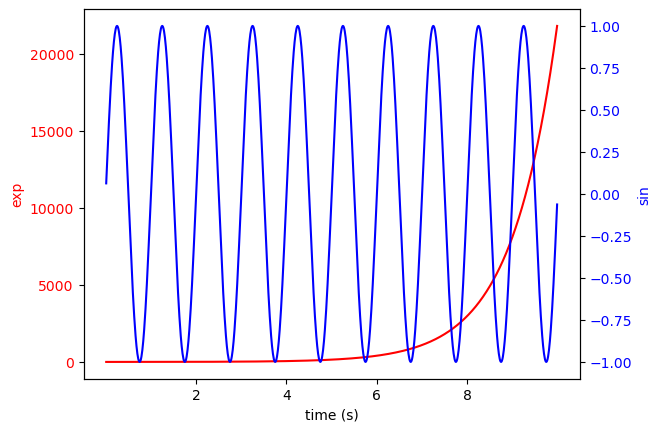

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color='red')
ax1.plot(t, data1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('sin', color='blue')
ax2.plot(t, data2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks([2, 4, 6, 8]);  # ax2

# ---

fig.savefig('2axis.png')

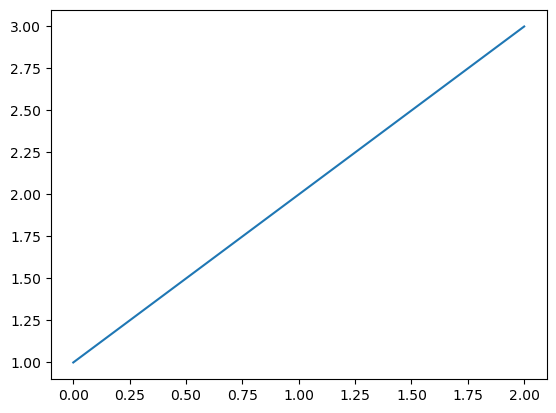

In [ ]:
# %matplotlib inline

plt.plot([1, 2, 3])

# plt.show()